In [308]:
# -- Variables
RANDOM_STATE = 42

# -- Import libraries
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns

# -- Import codes from folders
import os
cwd = os.getcwd()
%run "{cwd}\utils\plots.py"
%run "{cwd}\utils\data_cleansing.py"

# -- Load data
df_train_raw = pd.read_csv('data/train.csv', sep = ',')  
df_test_raw = pd.read_csv('data/test.csv', sep = ',')

# -4- Preparsing features
# -- male,female -> 0,1
def NormalizeGender(X):
    X_preparsed = X.copy(deep=True)
    X_preparsed.loc[
        X_preparsed['Sex']=='male',
        'Sex'
    ] = 0
    X_preparsed.loc[
        X_preparsed['Sex']=='female',
        'Sex'
    ] = 1
    X_preparsed['Sex'] = X_preparsed['Sex'].astype('bool')
    return X_preparsed
df_train_preparsed = NormalizeGender(df_train_raw)
df_test_preparsed = NormalizeGender(df_test_raw)



# -- Column used for counting
df_train_preparsed['Count'] = True; df_train_preparsed['Count'].astype('bool')
df_test_preparsed['Count'] = True; df_test_preparsed['Count'].astype('bool')

df_train_preparsed.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Count
0,1,0,3,"Braund, Mr. Owen Harris",False,22.0,1,0,A/5 21171,7.2500,NaN,S,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",True,38.0,1,0,PC 17599,71.2833,C85,C,True
2,3,1,3,"Heikkinen, Miss. Laina",True,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",True,35.0,1,0,113803,53.1000,C123,S,True
4,5,0,3,"Allen, Mr. William Henry",False,35.0,0,0,373450,8.0500,NaN,S,True


In [309]:
df_train_raw.nunique().sort_values()

Survived         2
Sex              2
Pclass           3
Embarked         3
SibSp            7
Parch            7
Age             88
Cabin          147
Fare           248
Ticket         681
PassengerId    891
Name           891
dtype: int64

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Count
Embarked,,,,,,,,,
C,74820,93,317,73,4005.92,65,61,10072.2962,168
Q,32178,30,224,36,786.50,33,13,1022.2543,77
S,289496,217,1514,203,16312.75,368,266,17439.3988,644


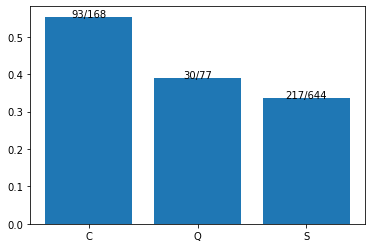

In [310]:
# -- Plot correlation between Embarked and Survived
Grouped = df_train_preparsed.groupby(
    ['Embarked']
).sum()
plt.bar(
    Grouped.index,
    Grouped['Survived'] / Grouped['Count']
)
Plot_ShowFigures(
    Grouped.index,
    Grouped['Survived'], Grouped['Count'], 
    Grouped['Survived'] / Grouped['Count']
                )
Grouped

In [312]:
# -4- Make categorical fields with few values numerical
# -- 'Embarked': C, Q, S -> 0.553571, 0.389610, 0.336957
df_train_numericized, SurvivalRatesForAllCategories = EncodeNumericalCategoricalVariables(
    df_train_preparsed, 
    'Embarked',
    NameToCalculateResultRate=('Survived','Count')
)
df_test_numericized, _ = EncodeNumericalCategoricalVariables(
    df_test_preparsed, 
    'Embarked',
    SurvivalRatesForAllCategories=SurvivalRatesForAllCategories
)
df_train_numericized.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Count
0,1,0,3,"Braund, Mr. Owen Harris",False,22.0,1,0,A/5 21171,7.2500,NaN,0.336957,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",True,38.0,1,0,PC 17599,71.2833,C85,0.553571,True
2,3,1,3,"Heikkinen, Miss. Laina",True,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.336957,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",True,35.0,1,0,113803,53.1000,C123,0.336957,True
4,5,0,3,"Allen, Mr. William Henry",False,35.0,0,0,373450,8.0500,NaN,0.336957,True


## Visualize correlations

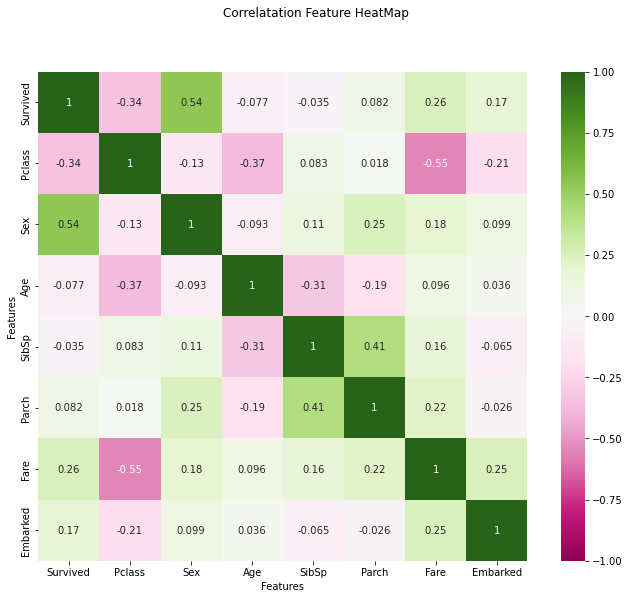

In [313]:
PlotFeaturesCorrelation( df_train_numericized, drops=['PassengerId','Count'] )

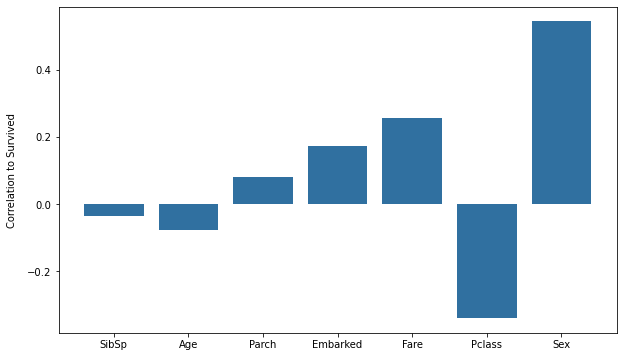

In [314]:
PlotCorrelationToResult( df_train_numericized, 'Survived', drops=['PassengerId', 'Count'] )

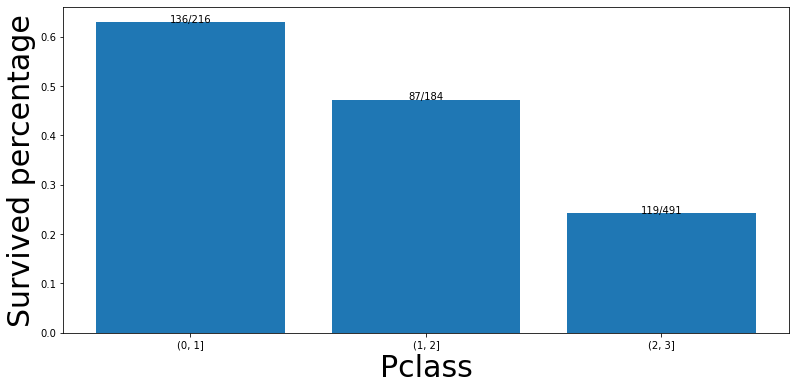

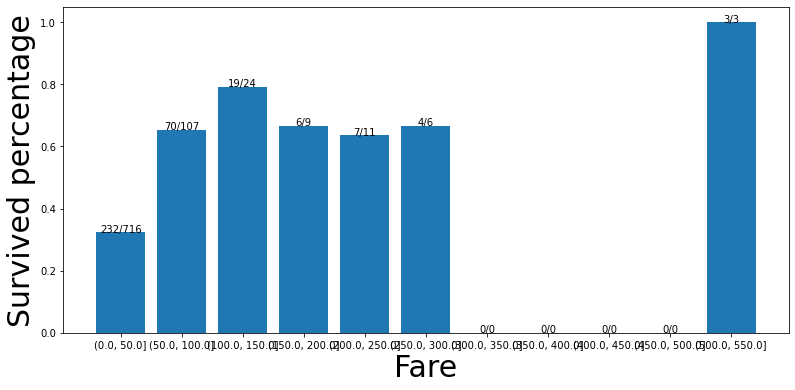

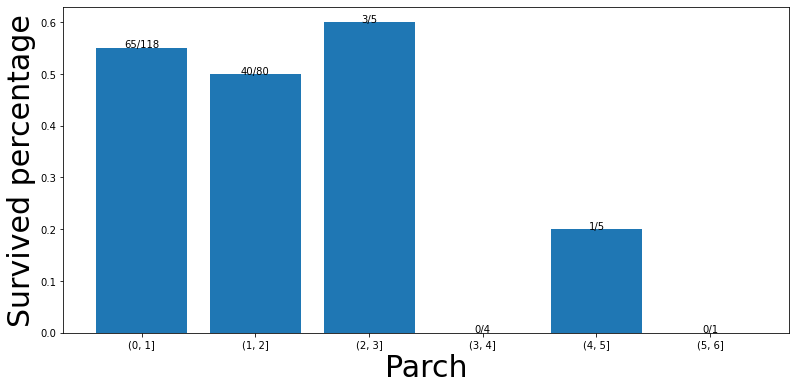

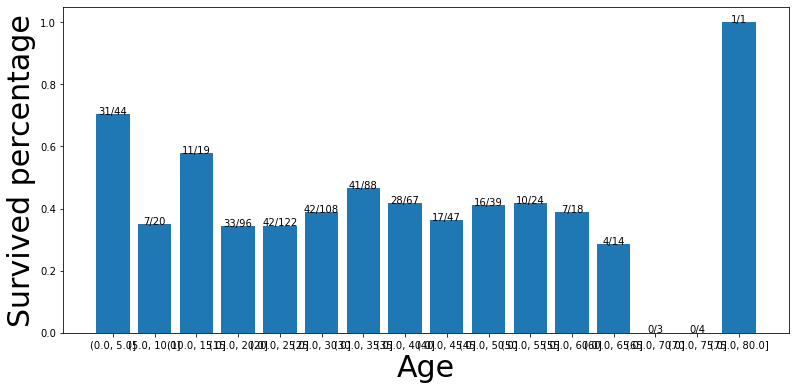

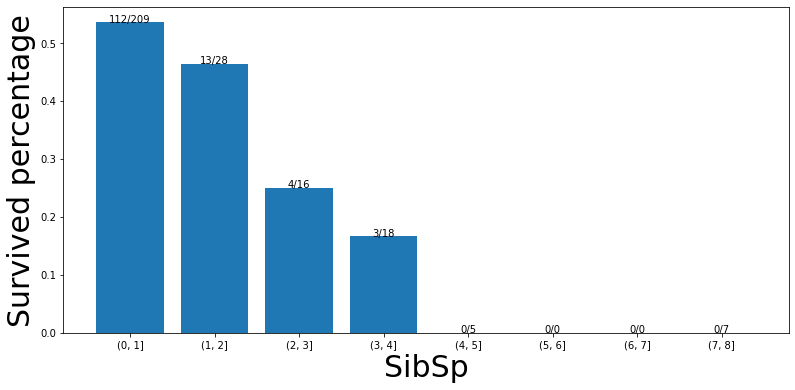

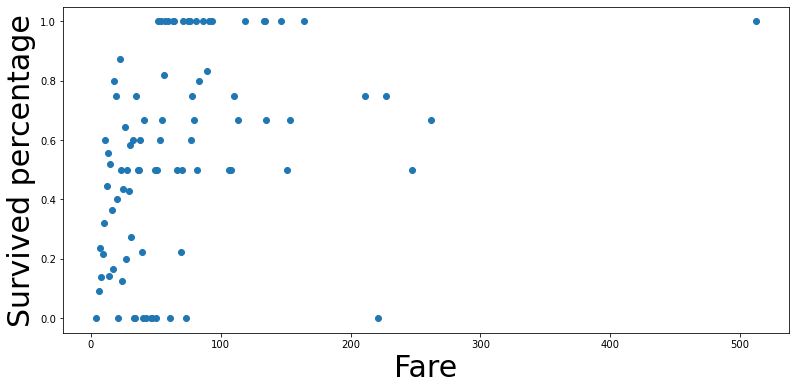

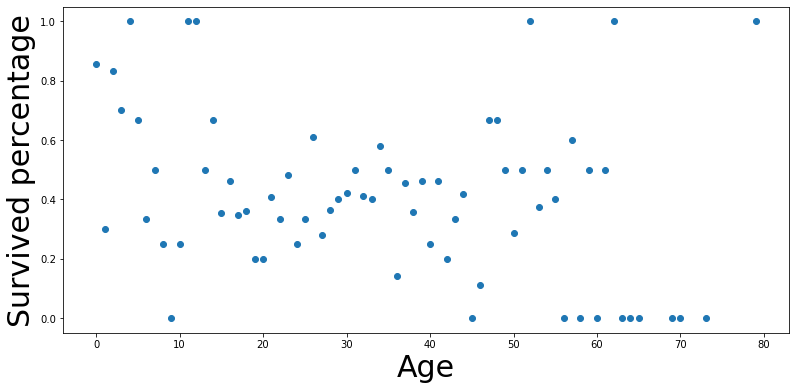

In [315]:
for feature_name, gap in [
    ('Pclass',1), 
    ('Fare',50),
    ('Parch',1), 
    ('Age',5),
    ('SibSp',1), 
]:
    Grouped = PlotFeatureGroups( 
        df_train_numericized, feature_name, 'Survived', gap=gap, 
        figsize=(13,6), ylabel='Survived percentage' 
    )
for feature_name, gap in [
    ('Fare',1), 
    ('Age',1), 
]:
    Grouped = PlotFeatureGroups( 
        df_train_numericized, feature_name, 'Survived', gap=gap, 
        plot=lambda x,y: plt.scatter(x,y), show_figures=False, 
        figsize=(13,6), ylabel='Survived percentage' 
    )

## Feature engineering

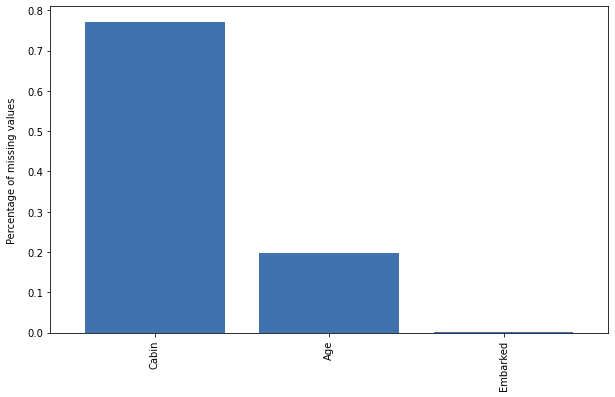

C:\Users\admin\Desktop\Canadian application\Jobs\Tensorflow\Titanic - Machine Learning from Disaster\utils\data_cleansing.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_clean = df.fillna(df.median())
C:\Users\admin\Desktop\Canadian application\Jobs\Tensorflow\Titanic - Machine Learning from Disaster\utils\data_cleansing.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_clean = df.fillna(df.median())


In [316]:
# -- Replace NaN
PlotNaNs( df_train )
df_train_numericized = ReplaceNaNs(df_train_numericized)
df_test_numericized = ReplaceNaNs(df_test_numericized)

In [317]:
# -- Drop first names
def DropFirstName(df_train_numericized):
    df_train_surnameOnly = df_train_numericized.copy(deep=True)
    Names = df_train_numericized['Name'].str.split(',', expand=True)
    df_train_surnameOnly['Surname'] = Names[0]
    df_train_surnameOnly = df_train_surnameOnly.drop('Name', axis=1)
    return df_train_surnameOnly
df_train_surnameOnly = DropFirstName(df_train_numericized)
df_test_surnameOnly = DropFirstName(df_test_numericized)
df_train_surnameOnly.head(3)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Count,Surname
0,1,0,3,False,22.0,1,0,A/5 21171,7.2500,NaN,0.336957,True,Braund
1,2,1,1,True,38.0,1,0,PC 17599,71.2833,C85,0.553571,True,Cumings
2,3,1,3,True,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.336957,True,Heikkinen


In [318]:
# -- Separate independent variables and dependent variables
X_train_clean = df_train_surnameOnly.drop(['PassengerId', 'Survived', 'Count'], axis=1)
y_train_clean = df_train_surnameOnly['Survived']
X_test_clean = df_test_surnameOnly.drop(['PassengerId', 'Count'], axis=1)
assert all(X_train_clean.columns == X_test_clean.columns)
X_train_clean

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surname
0,3,False,22.0,1,0,A/5 21171,7.2500,NaN,0.336957,Braund
1,1,True,38.0,1,0,PC 17599,71.2833,C85,0.553571,Cumings
2,3,True,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.336957,Heikkinen
3,1,True,35.0,1,0,113803,53.1000,C123,0.336957,Futrelle
4,3,False,35.0,0,0,373450,8.0500,NaN,0.336957,Allen
...,...,...,...,...,...,...,...,...,...,...
886,2,False,27.0,0,0,211536,13.0000,NaN,0.336957,Montvila
887,1,True,19.0,0,0,112053,30.0000,B42,0.336957,Graham
888,3,True,28.0,1,2,W./C. 6607,23.4500,NaN,0.336957,Johnston
889,1,False,26.0,0,0,111369,30.0000,C148,0.553571,Behr


In [319]:
# -- Split train validation data
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_clean, y_train_clean, 
    test_size=0.2, 
    random_state=RANDOM_STATE
)
assert X_train.shape[1] == X_valid.shape[1]
X_train

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surname
331,1,False,45.5,0,0,113043,28.5000,C124,0.336957,Partner
733,2,False,23.0,0,0,28425,13.0000,NaN,0.336957,Berriman
382,3,False,32.0,0,0,STON/O 2. 3101293,7.9250,NaN,0.336957,Tikkanen
704,3,False,26.0,1,0,350025,7.8542,NaN,0.336957,Hansen
813,3,True,6.0,4,2,347082,31.2750,NaN,0.336957,Andersson
...,...,...,...,...,...,...,...,...,...,...
106,3,True,21.0,0,0,343120,7.6500,NaN,0.336957,Salkjelsvik
270,1,False,28.0,0,0,113798,31.0000,NaN,0.336957,Cairns
860,3,False,41.0,2,0,350026,14.1083,NaN,0.336957,Hansen
435,1,True,14.0,1,2,113760,120.0000,B96 B98,0.336957,Carter


In [321]:
# -- Normalization and one hot
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
def NormalizeAndOneHot(Xs):
    # -- Separate numeric and non-numeric features
    features_numeric, features_non_numeric = \
        SeparateNumericAndNonNumericFeatures(
            Xs[0],
        )
    print(f'{features_numeric = }')
    print(f'{features_non_numeric = }')
    
    # -- 
    ct = make_column_transformer(
        ( # turn all values in these columns between 0 and 1
            MinMaxScaler(), 
            features_numeric[:-1]
        ),
        (
            OneHotEncoder(handle_unknown="ignore", sparse=False), 
            features_non_numeric
        )
    )
    ct.fit(Xs[0])
    
    Xs_normal = []
    for i in range(len(Xs)):
        Xs_normal.append(
            ct.transform(Xs[i])
        )
    return Xs_normal
X_train_normalized, X_valid_normalized, X_test_normalized = \
    NormalizeAndOneHot(
        [
            X_train,
            X_valid,
            X_test_clean
        ]
    )
assert X_train_normalized.shape[1] == \
        X_valid_normalized.shape[1] == \
        X_test_normalized.shape[1]
X_train_normalized

features_numeric = Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')
features_non_numeric = Index(['Ticket', 'Cabin', 'Surname'], dtype='object')


array([[0.        , 0.        , 0.56647399, ..., 0.        , 0.        ,
        0.        ],
       [0.5       , 0.        , 0.28373963, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.        , 0.39683338, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [1.        , 0.        , 0.50992712, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.17064589, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.25860769, ..., 0.        , 0.        ,
        0.        ]])

## Run Models

### LogisticRegression

In [414]:
# Run our model without tweecking the hyperparameters
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()# Fit our model to the training data
logreg.fit(X_train_normalized, y_train)# Predict on the test data
# logreg_predictions = logreg.predict(X_test_normalized)
logreg_predictions = logreg.predict(X_valid_normalized)
logreg_predictions
# logreg_data = pd.read_csv('test.csv')
# logreg_data.insert((logreg_data.shape[1]),'Survived',logreg_predictions)
# logreg_data.to_csv('LogisticRegression_SS_OH_FE2.csv')
# -- Mean Absolute Error
abs(y_valid.to_numpy()-logreg_predictions).sum() / len(logreg_predictions)

0.17318435754189945

In [416]:
df_test_raw

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [419]:
len(logreg_predictions)

179

In [420]:
# # Run our model without tweecking the hyperparameters
# from sklearn.linear_model import LogisticRegression
# logreg = LogisticRegression()# Fit our model to the training data
# logreg.fit(X_train_normalized, y_train)# Predict on the test data
# # logreg_predictions = logreg.predict(X_test_normalized)
# logreg_predictions = logreg.predict(X_test_normalized)
# logreg_predictions
# logreg_data = pd.read_csv('test.csv')
# logreg_data.insert((logreg_data.shape[1]),'Survived',logreg_predictions)
# logreg_data.to_csv('LogisticRegression_SS_OH_FE2.csv')
# -- Mean Absolute Error

logreg_test_prediction_noparatweak = pd.DataFrame(
    {
        'PassengerId': df_test_raw['PassengerId'].to_numpy(), 
        'Survived': logreg.predict(X_test_normalized)
    }
)
logreg_test_prediction_noparatweak.to_csv('submission2(Logistic Regression, no hyperparameter tweaking).csv', index=False)

In [374]:
# -- Grid Search
from sklearn import model_selection
import multiprocessing
cpus = multiprocessing.cpu_count()
print('cpus = ',cpus)

logreg = LogisticRegression()
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'dual': [True, False], 
    'tol': [1e-5, 1e-4, 1e-3],
    'C': [0.1, 1, 10, 100],
    'fit_intercept': [True, False],
    'intercept_scaling': [.1, 1, 10],
    'class_weight': [dict, 'balanced'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
}

model = model_selection.GridSearchCV(
    estimator=logreg,
    param_grid=param_grid,
    scoring='accuracy',
    verbose=1,
    n_jobs=cpus-1,
    cv=5
)
model.fit(X_train_normalized, y_train)
print(model.best_score_)
print(model.best_estimator_.get_params())

cpus =  16
Fitting 5 folds for each of 5760 candidates, totalling 28800 fits
0.8258642765685018
{'C': 10, 'class_weight': 'balanced', 'dual': True, 'fit_intercept': True, 'intercept_scaling': 10, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


C:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan ... 0.82303753 0.82303753 0.82023047]
  warnings.warn(
C:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [375]:
# -- Grid Search
from sklearn import model_selection
import multiprocessing
cpus = multiprocessing.cpu_count()
print('cpus = ',cpus)

logreg = LogisticRegression()
param_grid = {
    'penalty': ['l2'],
    'dual': [True], 
    'tol': [1e-5, 1e-4, 1e-3],
    'C': [2, 5, 10, 50, 90],
    'fit_intercept': [True],
    'intercept_scaling': [2, 5, 10, 50, 90],
    'class_weight': ['balanced'],
    'solver': ['liblinear'],
}

model = model_selection.GridSearchCV(
    estimator=logreg,
    param_grid=param_grid,
    scoring='accuracy',
    verbose=1,
    n_jobs=cpus-1,
    cv=5
)
model.fit(X_train_normalized, y_train)
print(model.best_score_)
print(model.best_estimator_.get_params())

cpus =  16
Fitting 5 folds for each of 75 candidates, totalling 375 fits
0.8258544272628778
{'C': 10, 'class_weight': 'balanced', 'dual': True, 'fit_intercept': True, 'intercept_scaling': 10, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


C:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [376]:
# -- Grid Search
from sklearn import model_selection
import multiprocessing
cpus = multiprocessing.cpu_count()
print('cpus = ',cpus)

logreg = LogisticRegression()
param_grid = {
    'penalty': ['l2'],
    'dual': [True], 
    'tol': [5e-5, 1e-4, 5e-4],
    'C': [7, 9, 10, 15, 25, 40],
    'fit_intercept': [True],
    'intercept_scaling': [7, 9, 10, 15, 25, 40],
    'class_weight': ['balanced'],
    'solver': ['liblinear'],
}

model = model_selection.GridSearchCV(
    estimator=logreg,
    param_grid=param_grid,
    scoring='accuracy',
    verbose=1,
    n_jobs=cpus-1,
    cv=5
)
model.fit(X_train_normalized, y_train)
print(model.best_score_)
print(model.best_estimator_.get_params())

cpus =  16
Fitting 5 folds for each of 108 candidates, totalling 540 fits
0.8314882300797795
{'C': 40, 'class_weight': 'balanced', 'dual': True, 'fit_intercept': True, 'intercept_scaling': 9, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'liblinear', 'tol': 0.0005, 'verbose': 0, 'warm_start': False}


C:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [377]:
# -- Grid Search
from sklearn import model_selection
import multiprocessing
cpus = multiprocessing.cpu_count()
print('cpus = ',cpus)

logreg = LogisticRegression()
param_grid = {
    'penalty': ['l2'],
    'dual': [True], 
    'tol': [8e-5, 5e-4, 7e-4],
    'C': [30, 35, 40, 42, 45],
    'fit_intercept': [True],
    'intercept_scaling': [8, 9, 9.5],
    'class_weight': ['balanced'],
    'solver': ['liblinear'],
}

model = model_selection.GridSearchCV(
    estimator=logreg,
    param_grid=param_grid,
    scoring='accuracy',
    verbose=1,
    n_jobs=cpus-1,
    cv=5
)
model.fit(X_train_normalized, y_train)
print(model.best_score_)
print(model.best_estimator_.get_params())

cpus =  16
Fitting 5 folds for each of 45 candidates, totalling 225 fits
0.8329163793952528
{'C': 40, 'class_weight': 'balanced', 'dual': True, 'fit_intercept': True, 'intercept_scaling': 9, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'liblinear', 'tol': 8e-05, 'verbose': 0, 'warm_start': False}


C:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [423]:
# -- Use model with the best hyperparameters
from sklearn.linear_model import LogisticRegression
logreg_paras = {'C': 40, 'class_weight': 'balanced', 'dual': True, 'fit_intercept': True, 'intercept_scaling': 9, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'liblinear', 'tol': 8e-05, 'verbose': 0, 'warm_start': False}
logreg_best = LogisticRegression(
    **logreg_paras
)
logreg_best.fit(X_train_normalized, y_train)# Predict on the test data
logreg_best_predictions = logreg_best.predict(X_valid_normalized)
logreg_best_predictions
# -- Mean Absolute Error
abs(y_valid.to_numpy()-logreg_best_predictions).sum() / len(logreg_best_predictions)

C:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.16201117318435754

In [424]:
# -- K-Fold Cross Validation
from sklearn.model_selection import cross_val_score
skf = StratifiedKFold(n_splits=5, shuffle=True)
scores = cross_val_score(
    logreg_best, X_train_normalized, y_train, cv=skf, scoring='accuracy'
)
scores

C:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


array([0.79020979, 0.81818182, 0.81690141, 0.83098592, 0.81690141])

In [426]:
np.array([0.79020979, 0.81818182, 0.81690141, 0.83098592, 0.81690141]).mean()

0.8146360699999999

In [425]:
# -- K-Fold Cross Validation
from sklearn.model_selection import cross_val_score
skf = StratifiedKFold(n_splits=5, shuffle=True)
scores = cross_val_score(
    logreg_best, X_valid_normalized, y_valid, cv=skf, scoring='accuracy'
)
scores

C:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


array([0.77777778, 0.86111111, 0.72222222, 0.77777778, 0.85714286])

In [427]:
np.array([0.77777778, 0.86111111, 0.72222222, 0.77777778, 0.85714286]).mean()

0.7992063500000001

In [399]:
# -- Train model with all data and predict with test data
# 
X_train_final = np.concatenate( (X_train_normalized, X_valid_normalized) )
y_train_final = np.concatenate( (y_train, y_valid) )
# 
from sklearn.linear_model import LogisticRegression
logreg_paras = {'C': 40, 'class_weight': 'balanced', 'dual': True, 'fit_intercept': True, 'intercept_scaling': 9, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'liblinear', 'tol': 8e-05, 'verbose': 0, 'warm_start': False}
logreg_best_final = LogisticRegression(
    **logreg_paras
)
logreg_best_final.fit(X_train_final, y_train_final)# Predict on the test data
logreg_best_final_predictions = logreg_best_final.predict(X_test_normalized)
logreg_best_final_predictions
# logreg_data = pd.read_csv('test.csv')
# logreg_data.insert((logreg_data.shape[1]),'Survived',logreg_predictions)
# logreg_data.to_csv('LogisticRegression_SS_OH_FE2.csv')
# -- Mean Absolute Error


C:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [411]:
logreg_test_prediction = pd.DataFrame(
    {
        'PassengerId': df_test_raw['PassengerId'].to_numpy(), 
        'Survived': logreg_best_final_predictions
    }
)
logreg_test_prediction.to_csv('submission1(Logistic Regression).csv', index=False)

In [405]:
df_test_raw['PassengerId']

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

### LinearRegression

In [356]:
from sklearn.linear_model import LinearRegression
linereg = LinearRegression()# Fit our model to the training data
linereg.fit(X_train_normalized, y_train)# Predict on the test data
linereg_predictions = linereg.predict(X_valid_normalized)
# -- Cast prediction to 0 xor 1
linereg_predictions_int = []
for i in linereg_predictions:
    if i < .5:
        linereg_predictions_int.append(0)
    else:
        linereg_predictions_int.append(1)
linereg_predictions_int
# -- Mean Absolute Error
abs(y_valid.to_numpy()-linereg_predictions_int).sum() / len(linereg_predictions_int)

0.39664804469273746

In [325]:
# -- Save prediction
